In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [85]:
b = sp.Symbol("b",positive=True)
c = sp.Symbol("c",positive=True)
T = sp.Symbol("T",positive=True)
w = sp.Symbol("w",positive=True)
k = sp.Symbol("k",positive=True)

Av = sp.Abs((-sp.I *c +w*(-T*c+b))/(b*w-sp.I*c+sp.I*w**2))
Av2 = (Av**2).simplify()
Av2

(T**2*c**2*w**2 - 2*T*b*c*w**2 + b**2*w**2 + c**2)/(b**2*w**2 + c**2 - 2*c*w**2 + w**4)

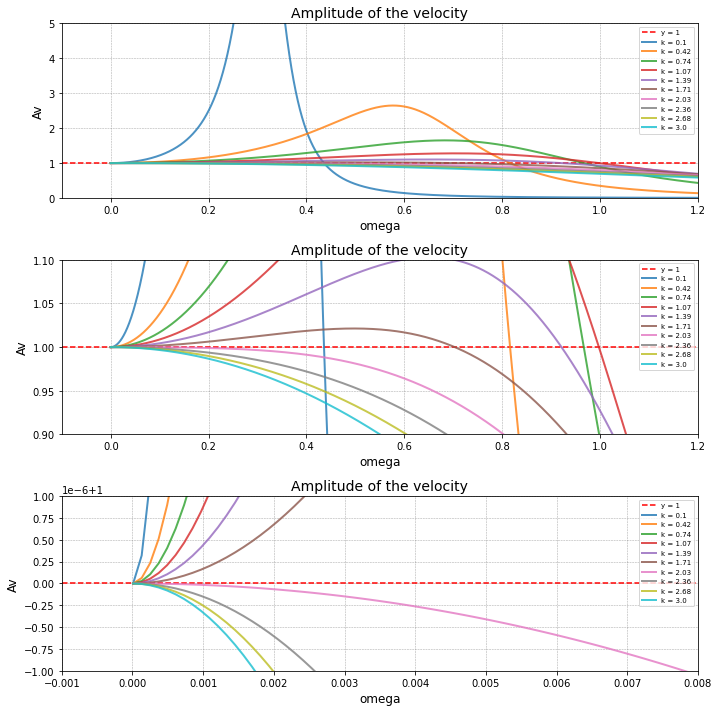

In [108]:
ks = np.linspace(1e-5,1.2,10000)
qs = np.linspace(1e-1,3,10)

Avk = sp.lambdify((b,c,T,w),(Av2), modules="numpy")

fig, ax = plt.subplots(3, 1, figsize=(10, 10))


ylims = [[0, 5],[0.9, 1.1],[1-1e-6, 1+1e-6]]
xlims = [[-0.1, 1.2],[-0.1, 1.2],[-0.001, 0.008]]

for j in range(len(xlims)):
    ax[j].axhline(1, color='red', linestyle='--', linewidth=1.5, label="y = 1")
    
    for q in qs:
        ax[j].plot(ks, Avk(q, q, np.ones_like(ks), ks),
                label=f"k = {np.round(q, 2)}",
                linewidth=2, alpha=0.8)

    # Add horizontal line at y=1

    # Set y-ticks and y-limits
    # ax[j].set_yticks(np.arange(-0.5, 11, 0.5))
    ax[j].set_ylim(ylims[j])
    ax[j].set_xlim(xlims[j])

    # Add gridlines for both axes
    ax[j].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Labels and title
    ax[j].set_xlabel("omega", fontsize=12)
    ax[j].set_ylabel("Av", fontsize=12)
    ax[j].set_title("Amplitude of the velocity", fontsize=14)

    # Legend
    ax[j].legend(loc="upper right", fontsize=7, frameon=True)

# Show the plot
plt.tight_layout()
plt.show()


In [134]:
Av2.subs({T:1,b:k,c:k})

Av2.subs({T:1,b:k,c:k}).subs(k,2).subs(w,1)

4/5

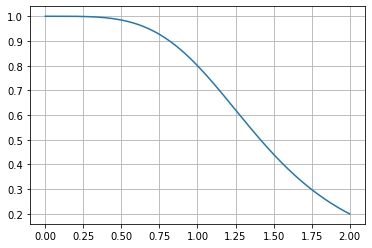

In [126]:
xs = np.linspace(0,2,1000)

plt.plot(xs,4/(xs**4+4))
plt.grid()

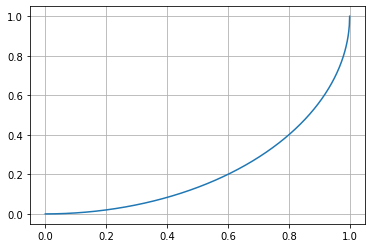

In [129]:
xs = np.linspace(0,1,1000)
plt.plot(xs,1-np.sqrt(1-xs**2))
plt.grid()

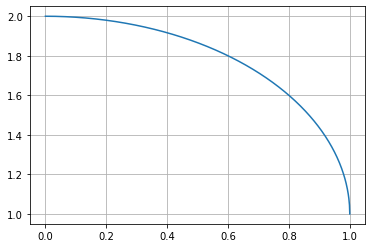

In [132]:
xs = np.linspace(0,1,1000)
plt.plot(xs,1+np.sqrt(1-xs**2))
plt.grid()

In [120]:
# print(sp.latex(Av2.subs({T:1,b:k,c:k})))
Av2_sol_k = sp.solve(Av2.subs({T:1,b:k,c:k}) - 1,k)

k_sol1 = sp.lambdify((w),Av2_sol_k[0],modules="numpy")
k_sol2 = sp.lambdify((w),Av2_sol_k[1],modules="numpy")
Av2_sol_k


[1 - sqrt(1 - w**2), sqrt(1 - w**2) + 1]

In [ ]:
ks = np.linspace(1e-5,1.2,10000)
qs = np.linspace(1e-1,3,10)

Avk = sp.lambdify((b,c,T,w),(Av2), modules="numpy")

fig, ax = plt.subplots(2, 1, figsize=(10, 10))


for j in range(2):
    ax[j].axhline(1, color='red', linestyle='--', linewidth=1.5, label="y = 1")
    
    for q in qs:
        ax[j].plot(ks, Avk(q, q, np.ones_like(ks), ks),
                label=f"k = {np.round(q, 2)}",
                linewidth=2, alpha=0.8)

    # Add horizontal line at y=1

    # Set y-ticks and y-limits
    # ax[j].set_yticks(np.arange(-0.5, 11, 0.5))
    ax[j].set_ylim(ylims[j])
    ax[j].set_xlim(xlims[j])

    # Add gridlines for both axes
    ax[j].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Labels and title
    ax[j].set_xlabel("omega", fontsize=12)
    ax[j].set_ylabel("Av", fontsize=12)
    ax[j].set_title("Amplitude of the velocity", fontsize=14)

    # Legend
    ax[j].legend(loc="upper right", fontsize=7, frameon=True)

# Show the plot
plt.tight_layout()
plt.show()

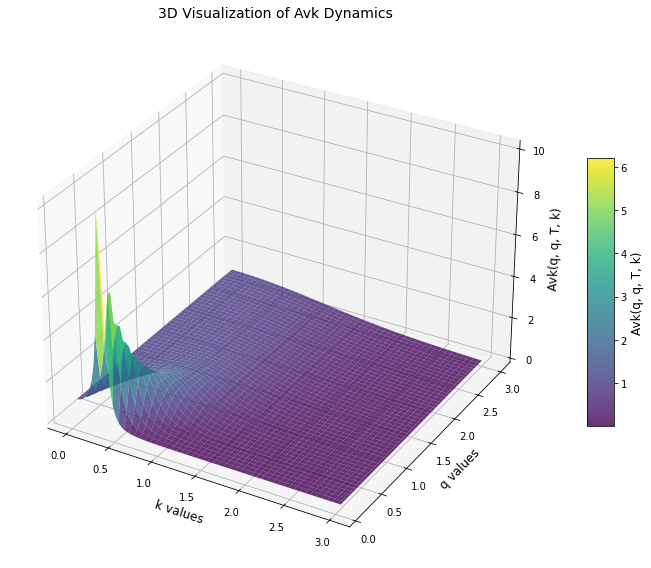

In [61]:
# Define data
ks = np.linspace(1e-3, 3, 100)  # x-axis (k values)
qs = np.linspace(0.1, 3, 50)   # y-axis (q values)

# Create a meshgrid for ks and qs
K, Q = np.meshgrid(ks, qs)

# Evaluate Avk for q=q
Z = Avk(Q, Q, np.ones_like(K), K)

# 3D Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(K, Q, Z, cmap="viridis", edgecolor='none', alpha=0.8)

# Color bar to show the scale
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Avk(q, q, T, k)", fontsize=12)

# Labels and Title
ax.set_xlabel("k values", fontsize=12)
ax.set_ylabel("q values", fontsize=12)
ax.set_zlabel("Avk(q, q, T, k)", fontsize=12)
ax.set_title("3D Visualization of Avk Dynamics", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
fc_w = sp.solve(1-(Av**2).subs({b:c*T}).subs(T,1).simplify())


In [114]:
fc_w[1][c]

sqrt(1 - w**2) + 1

In [79]:
(Av**2).subs({b:c*T}).subs(T,1)

c**2/(c**2*w**2 + c**2 - 2*c*w**2 + w**4)

In [93]:
(Av**2).subs({b:c*T}).subs(T,1).subs(c,fc_w[0][c])

(1 - sqrt(1 - w**2))**2/(w**4 + w**2*(1 - sqrt(1 - w**2))**2 - 2*w**2*(1 - sqrt(1 - w**2)) + (1 - sqrt(1 - w**2))**2)

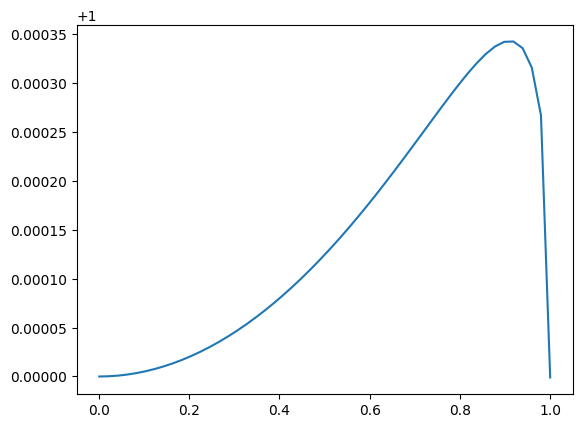

In [116]:
fc = sp.lambdify(w,fc_w[0][c])


def Av_w(W,k):
    return (Av**2).subs({b:c*T}).subs(T,1).subs(c,fc_w[1][c]+k).subs(w,W)

xs = np.linspace(1e-3,1)


ys = [Av_w(xi,1e-3).simplify() for xi in xs]
plt.plot(xs,ys)
# ys


In [4]:
(Av**2).subs({c:0})

b**2*w**2/(b**2*w**2 + w**4)

In [5]:
(Av**2).subs({b:c*1,T:1}).subs({w:c**2}).simplify()


1/(c**6 + c**4 - 2*c**3 + 1)

In [6]:
f = sp.lambdify((c),(Av**2).subs({b:c*1,T:1}).subs({w:c**2}).simplify())


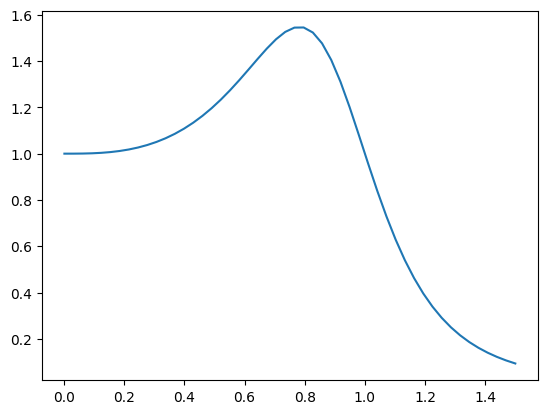

In [19]:
xs = np.linspace(1e-3,1.5)

plt.plot(xs,f(xs))

In [35]:


f(1,2)




(0.07692307692307693, 0.0769230769230769)

In [60]:
(c**2/(c**2*w**2 + (w**2-c)*(w**2-c)))

c**2/(c**2*w**2 + (-c + w**2)**2)

In [58]:
Av**2

(T**2*c**2*w**2 - 2*T*b*c*w**2 + b**2*w**2 + c**2)/(b**2*w**2 + c**2 - 2*c*w**2 + w**4)

In [27]:
((b**2-c)*(b**2-c)).expand()

b**4 - 2*b**2*c + c**2